(sec:boxplot)=
# Der Boxplot

Der Boxplot ist eine einfache und schnelle Methode sich die Verteilung der Werte einer Stichprobe graphisch zu verdeutlichen. Voraussetzng ist, dass die Daten **metrisch** skaliert sind. Er basiert auf den wichtigen Quantilen:

$$ q_{0.25},\quad q_{0.5}, \quad q_{0.75}$$

Er gibt einen Überblick über zentrale Lage, Streuung und mögliche Ausreißer einer Datenmenge.

Wir schauen uns zunächst einen Boxplot an.

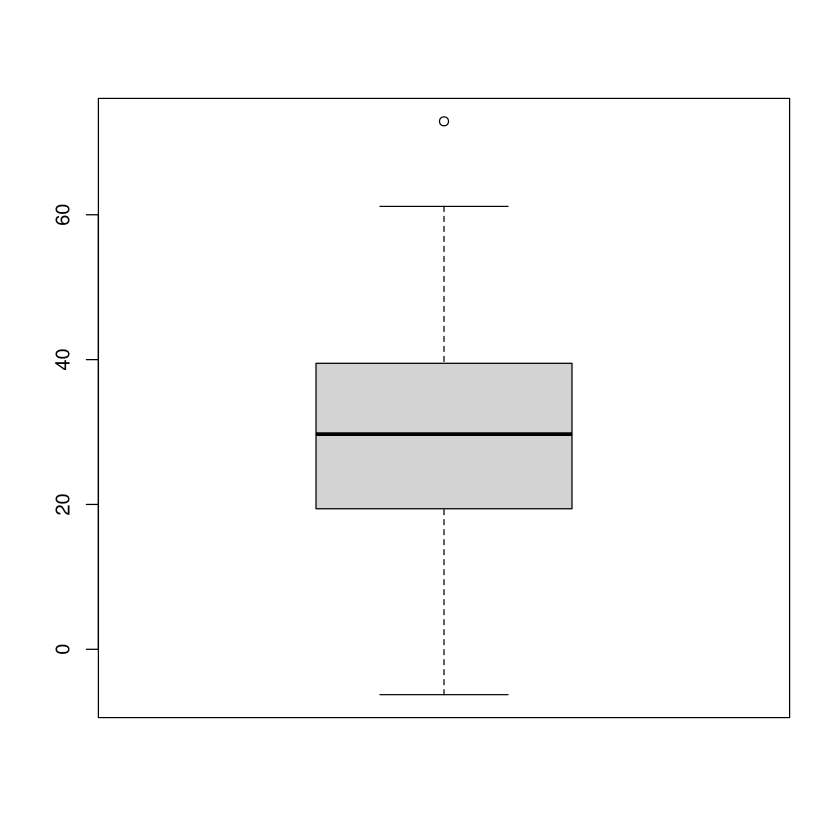

In [2]:
set.seed(245)                            # sorgt dafür dass der "Zufall" immer die gleichen Werte liefert
x <- rnorm(100,mean = 30, sd= 15)        # x enthält 100 zufällig ausgewählte Zahlen
boxplot(x)                               # erstellt den Boxplot

## Erklärung

- Der fette Strich in der Mitte zeigt den **Median** an. Er liegt hier etwa bei $30$.
- Das obere Ende der grauen Box ist auf der Höhe des **0.75-Quantils**, das untere auf der Höhe des **0.25-Quantils**.
- Das Ende der oberene Antenne (engl. whiskers) wird wie folgt bestimmt:
  Addiere zum 0.75-Quantil das 1.5-fache des IQR. Der größte Stichprobenwert, der kleiner als diese Zahl ist, ist das Ende der Antenne.
- Das Ende der unteren Antenne (engl. whiskers) wird wie folgt bestimmt:
  Addiere zum 0.75-Quantil das 1.5-fache des IQR. Der größte Stichprobenwert, der kleiner als diese Zahl ist, ist das Ende der Antenne.
- Jeder Datenpunkt der außerhalb der Whiskers liegt, wird als einzelner Punkt eingetragen. Dies sind **Ausreißer**.
- Die Breite der Box hat keine Relevanz

## Sonderfall

- Gibt es keine Wert zwischen $q_{0.75}$ und $q_{0.75} + 1.5\cdot IQR$, so gibt es die obere Antenne nicht. Alle Werte oberhalb von $q_{0.75}$ werden dann als Punkte dargestellt.
- Gibt es keine Wert zwischen $q_{0.25}$ und $q_{0.25} - 1.5\cdot IQR$, so gibt es die untere Antenne nicht. Alle Werte unterhalb von $q_{0.25}$ werden dann als Punkte dargestellt.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   5.000   7.111   5.000  20.000 

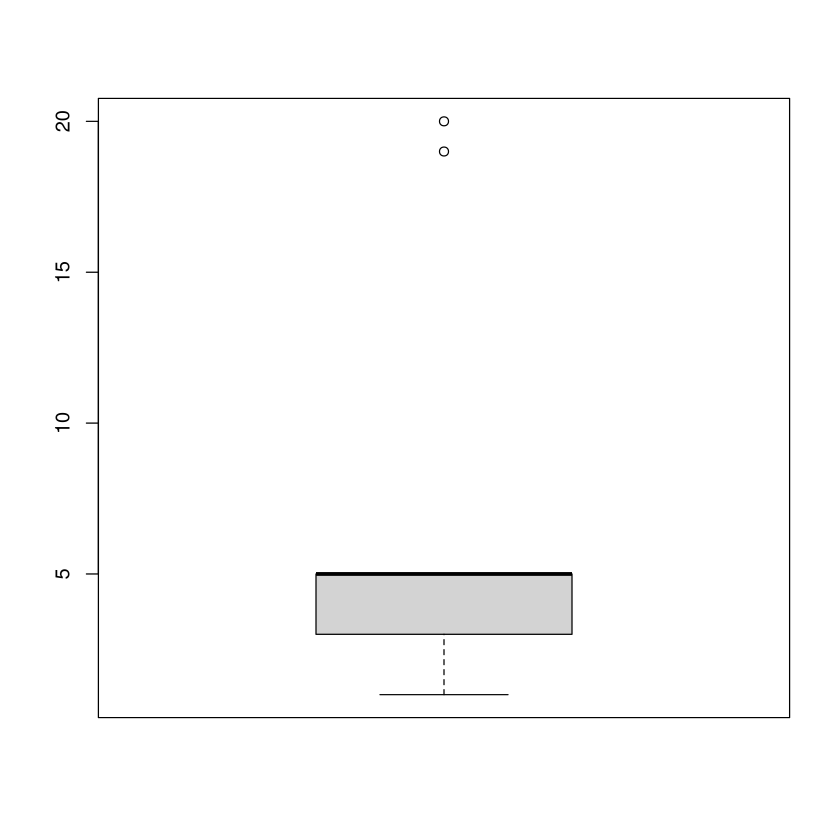

In [5]:
x <- c(1,2,3,4,5,5,5,19,20)
summary(x)
boxplot(x)

## Vorteile des Boxplots
- Kompakte Darstellung: Zeigt schnell wichtige Verteilungsmerkmale einer Datenmenge.
- Robust gegenüber Ausreißern: Der Median und der IQR sind nicht von extremen Werten beeinflusst.
- Vergleichbarkeit: Mehrere Boxplots können nebeneinander gezeichnet werden, um Gruppen zu vergleichen.
- Erkennt Streuung und Symmetrie: gibt schnell einen Anhaltspunkt, ob Daten symmetrisch oder schief verteilt sind.

## Nachteile des Boxplots
- Keine detaillierten Informationen zur Verteilung: Boxplots zeigen keine genaue Form der Verteilung (z. B. ob die Daten bimodal sind). Alle Informationen in den Daten sind auf wenige Kennzahlen reduziert.
- Abhängigkeit von IQR: die 1,5×IQR-Regel kann - je nach Verteilung - zu sehr vielen oder zu sehr wenigen Ausreißern führen.
- Keine absolute Häufigkeitsangaben: Boxplots geben keinen direkten Hinweis auf die Anzahl der Datenpunkte.

(section:mehrereboxplots)=
## Mehrere Boxplots in einer Grafik

Man kann Boxplots auch nutzen um die Verteilung von mehreren Datensätzen miteinader zu vergleichen.

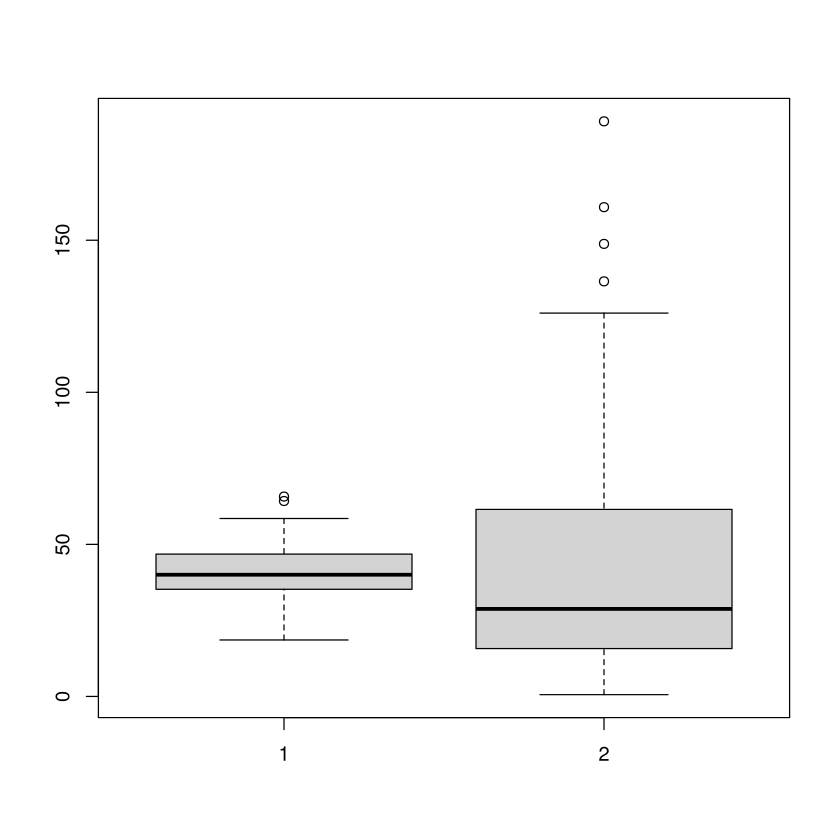

In [16]:
set.seed(250)
x <- rnorm(80, mean=40, sd=10)
y <- rexp(80,rate = 0.025)
boxplot(x,y)

Die erste Stichporbe hat eine deutlich geringere Streuung. Zudem scheint die Verteilung sehr symmetrisch zu sein. Die zweite Stichprobe hat eine deutlich größere Streuung und ist rechtsschief.

Oft sind die Daten auch so abgespeichert, dass in einer Spalte der Zahlenwert steht und in einer weiteren die Gruppe. Dies ist etwa im Datensatz `iris` der Fall. Der Datensatz enthält Messungen zu drei verschiedene Sorten von Schwertlilien: `setosa`, `versicolor` und `virginica`. Mit `head(iris)` schauen wir uns die ersten 5 Zeilen des Datensatzes an.

In [1]:
head(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

Es soll nun in 3 Boxplots das Merkmal `Sepal.Length` zwischen den Gruppen verglichen werden.

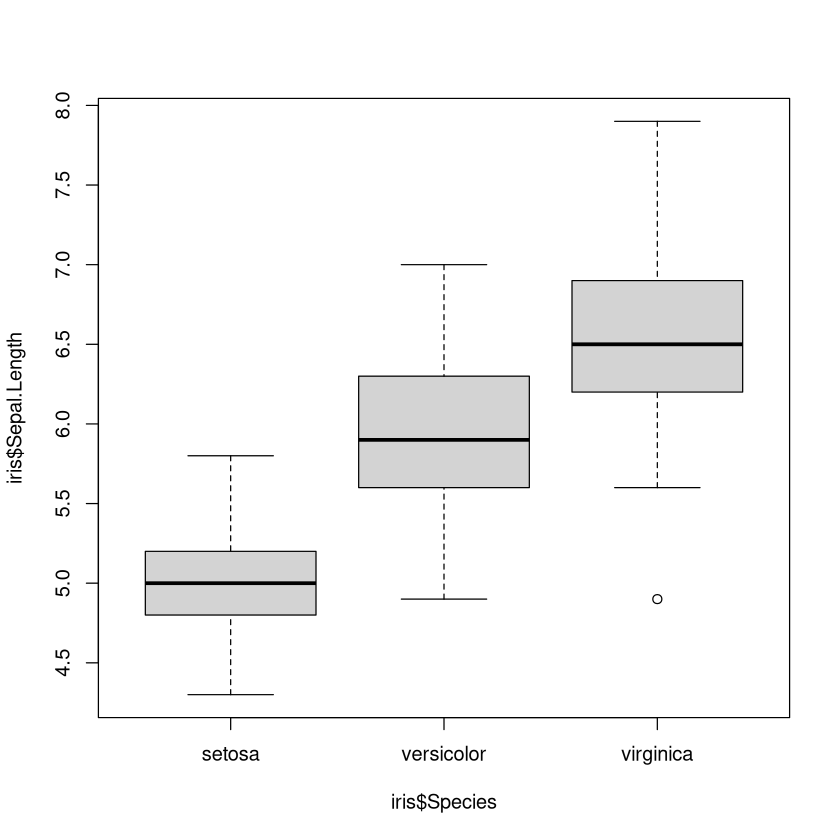

In [3]:
boxplot(iris$Sepal.Length ~ iris$Species)

(section:boxplotsordinal)=
## Boxplots für ordinale messbare Daten

Da sich auch für ordinal messbare Daten Qunatile berechnen lassen, ist es auch möglich diese einem Boxplot zu visualisieren. Allerdings gibt es hier ein paar Dinge zu beachten:

- Die Einteilung der $y$-Achse erfolgt äquidistant, d.h. die Ausprägungen werden entsprechend ihrer Reihenfolge in je gleichen Abständen auf der $y$-Achse abgetragen. Da die Abstände für ordinale Merkmale keine Bedeutung haben, kann dies etwas irreführend sein.
- Die Quantile werden entsprechend der Methode im Kapitel [](sonderfall:quantilordinal) bestimmt.
- Die Antennen/Whiskers gehen je bis zum extremsten in der Stichprobe vorkommenden Wert
- Für diesen Fall gibt es keine Standardfunktion in R. Wir "basteln" uns daher die Grafik.

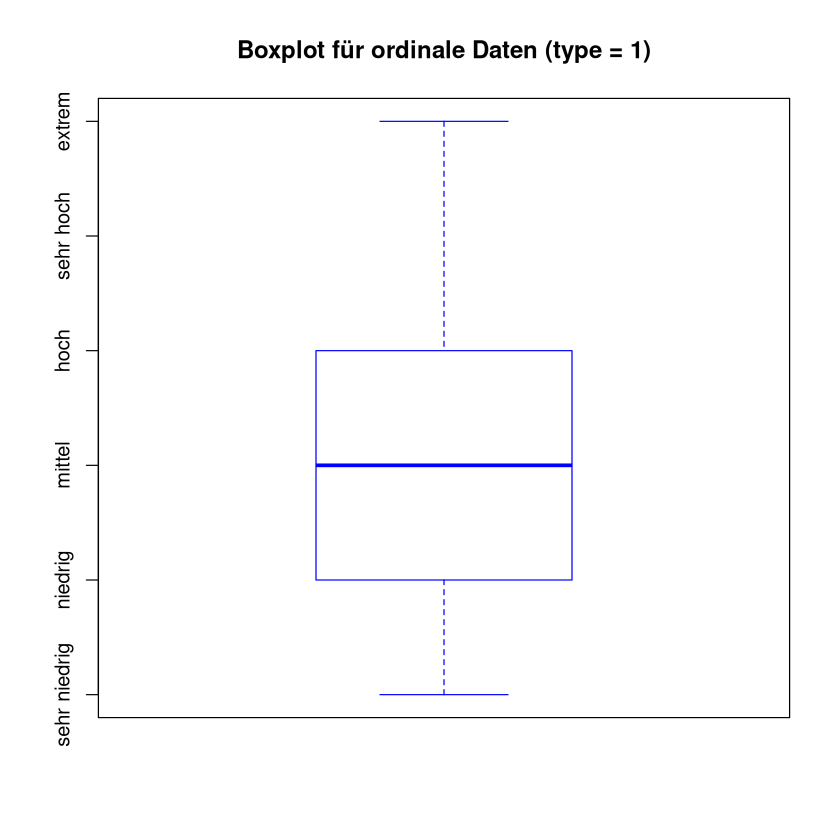

In [5]:
# Ordinale Daten als Faktor definieren
x <- factor(c("niedrig","extrem", "mittel", "hoch", "mittel", "hoch", 
              "niedrig", "hoch","sehr niedrig", "mittel", "sehr hoch", 
              "hoch", "mittel", "hoch", "hoch", "sehr hoch", "sehr niedrig",
              "sehr hoch","niedrig","niedrig"),
            levels = c("sehr niedrig","niedrig", "mittel", "hoch","sehr hoch","extrem"), 
            ordered = TRUE)

# Faktor in numerische Werte umwandeln
x_numeric <- as.numeric(x)

# Berechnung der Quartile mit type = 1
q1 <- quantile(x_numeric, 0.25, type = 1)
q2 <- quantile(x_numeric, 0.50, type = 1)  # Median
q3 <- quantile(x_numeric, 0.75, type = 1)

# Whisker-Grenzen als min/max der vorhandenen Werte
lower_whisker <- min(x_numeric)
upper_whisker <- max(x_numeric)

# Boxplot-Datenstruktur für `bxp()`
boxplot_data <- list(
  stats = matrix(c(lower_whisker, q1, q2, q3, upper_whisker), ncol = 1),
  n = length(x_numeric),
  conf = matrix(NA, nrow = 2, ncol = 1),  # Nicht genutzt
  out = numeric(0),                       # Keine numerischen Ausreißer
  group = integer(0)                      # Leere Gruppen
)

# Zeichne den Boxplot mit angepasster y-Achse
bxp(boxplot_data, main = "Boxplot für ordinale Daten (type = 1)", border = "blue",
    yaxt = "n")  # y-Achse manuell setzen

# Manuelle Achsenbeschriftung für Ordinalskala
axis(2, at = 1:length(levels(x)), labels = levels(x))


Auf ähnliche Weise lässt sich auch ein zweiter Boxplot zu einem weiteren Datensatz mit einfügen.

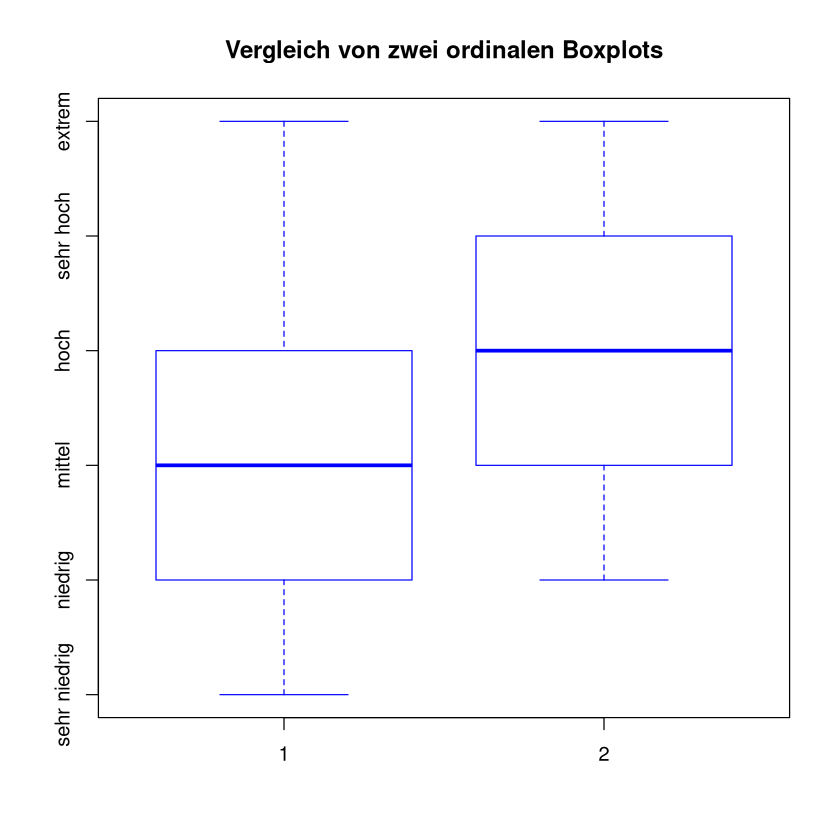

In [9]:
# Zwei ordinal skalierte Variablen als Faktoren definieren
x1 <- factor(c("niedrig","extrem", "mittel", "hoch", "mittel", "hoch", 
              "niedrig", "hoch","sehr niedrig", "mittel", "sehr hoch", 
              "hoch", "mittel", "hoch", "hoch", "sehr hoch", "sehr niedrig",
              "sehr hoch","niedrig","niedrig"),
            levels = c("sehr niedrig","niedrig", "mittel", "hoch","sehr hoch","extrem"), 
            ordered = TRUE)

x2 <- factor(c("niedrig","extrem", "mittel", "sehr hoch", "mittel", "hoch", 
              "sehr hoch", "hoch","niedrig", "mittel", "sehr hoch", 
              "hoch", "mittel", "hoch", "hoch", "sehr hoch", "niedrig",
              "sehr hoch","mittel","mittel"),
            levels = c("sehr niedrig","niedrig", "mittel", "hoch","sehr hoch","extrem"), 
            ordered = TRUE)

# Umwandlung in numerische Werte
x1_numeric <- as.numeric(x1)
x2_numeric <- as.numeric(x2)

# Berechnung der Quartile mit type = 1 für beide Boxplots
q1_x1 <- quantile(x1_numeric, 0.25, type = 1)
q2_x1 <- quantile(x1_numeric, 0.50, type = 1)
q3_x1 <- quantile(x1_numeric, 0.75, type = 1)

q1_x2 <- quantile(x2_numeric, 0.25, type = 1)
q2_x2 <- quantile(x2_numeric, 0.50, type = 1)
q3_x2 <- quantile(x2_numeric, 0.75, type = 1)

# Whisker-Grenzen als min/max der vorhandenen Werte
lower_whisker_x1 <- min(x1_numeric)
upper_whisker_x1 <- max(x1_numeric)

lower_whisker_x2 <- min(x2_numeric)
upper_whisker_x2 <- max(x2_numeric)

# Boxplot-Datenstruktur für `bxp()`
boxplot_data <- list(
  stats = matrix(
    c(lower_whisker_x1, q1_x1, q2_x1, q3_x1, upper_whisker_x1, 
      lower_whisker_x2, q1_x2, q2_x2, q3_x2, upper_whisker_x2), 
    ncol = 2, byrow = FALSE),  # Zwei Spalten für zwei Boxplots
  n = c(length(x1_numeric), length(x2_numeric)),
  conf = matrix(NA, nrow = 2, ncol = 2),  # Nicht genutzt
  out = numeric(0),  # Keine numerischen Ausreißer
  group = integer(0)  # Leere Gruppen
)

# Zeichne die Boxplots mit angepasster y-Achse
bxp(boxplot_data, main = "Vergleich von zwei ordinalen Boxplots", border = "blue",
    yaxt = "n", names = c("Variable 1", "Variable 2"))  # Kategorien beschriften

# Manuelle Achsenbeschriftung für Ordinalskala
axis(2, at = 1:length(levels(x1)), labels = levels(x1))
